In [ ]:
##PRIVACY PRESERVING ALGORITHMS IN MACHINE LEARNING###
#Privacy-Preserving Machine Learning is a step-by-step approach to preventing data leakage in machine learning algorithms.
#Referred From- " https://www.analyticsvidhya.com/blog/2022/02/privacy-preserving-in-machine-learning-ppml/#:~:text=These%20techniques%20include%20perturbation%20techniques,specific%20approaches%20like%20federated%20learning."


In [ ]:
#Diffprivlib is a general-purpose library for experimenting with, investigating and developing applications in, differential privacy.

#Use diffprivlib if you are looking to:

# - Experiment with differential privacy
# - Explore the impact of differential privacy on machine learning accuracy using classification and clustering models
# - Build your own differential privacy applications, using our extensive collection of mechanisms
# Please Refer the reference folder in LAB-13 -  Paper - "Diffprivlib: The IBM Dierential Privacy Library" 

Diffprivlib is comprised of four major components:

Mechanisms: These are the building blocks of differential privacy, and are used in all models that implement differential privacy. Mechanisms have little or no default settings, and are intended for use by experts implementing their own models. They can, however, be used outside models for separate investigations, etc.

Models: This module includes machine learning models with differential privacy. Diffprivlib currently has models for clustering, classification, regression, dimensionality reduction and pre-processing.

Tools: Diffprivlib comes with a number of generic tools for differentially private data analysis. This includes differentially private histograms, following the same format as Numpy's histogram function.

Accountant: The BudgetAccountant class can be used to track privacy budget and calculate total privacy loss using advanced composition techniques.

In [ ]:
#The library is designed to run with Python 3. The library can be installed from the PyPi repository using pip (or pip3)

In [4]:
!pip install diffprivlib

     |████████████████████████████████| 87 kB 3.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for diffprivlib: filename=diffprivlib-0.5.1-py3-none-any.whl size=162306 sha256=997bb5ab444e7bc0473f2fbbcf2a3bec5590c8304413c7ee4f35251cbd6747d8
  Stored in directory: /root/.cache/pip/wheels/88/fb/35/44ce5d133fbdc88e5cbad820d700b62a4a7bb7c160408d0493
Successfully built diffprivlib
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [48]:
#We start by importing the required libraries and modules 

from sklearn import metrics
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#DATSET-IRIS DATASET
#The Iris dataset was used in R.A. Fisher's classic 1936 paper,
#"The Use of Multiple Measurements in Taxonomic Problems" , and can also be found on the UCI Machine Learning Repository.

#It includes three iris species with 50 samples each as well as some properties about each flower. 
#One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

#The columns in this dataset are:

#Id
#SepalLengthCm
#SepalWidthCm
#PetalLengthCm
#PetalWidthCm
#Species
##Please Refer The Refernce Folder In LAB-13 For More info ##

In [49]:
#Load the dataset- IRIS dataset
iris = pd.read_csv("/content/IRIS.csv")

# iloc()-integer-location based indexing for selection by position.iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.
# Ref-" https://www.askpython.com/python/built-in-methods/python-iloc-function"
# First parameter inside the iloc()- rows
# Second Parameter inside the iloc()- column // Randomly Chosen

X =  iris.iloc[:, [0, 1, 2, 3]].values
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
#CASE1-EVALUATING KMEANS WITHOUT PRIVACY PRESERVING MECHANISM

In [ ]:
#KMeans with no privacy
#To begin, let's first train a regular (non-private) KMEANS, and test its accuracy.

In [ ]:
#How to Implementing K-Means Clustering ?
#1.Choose the number of clusters k
#2.Select k random points from the data as centroids
#3.Assign all the points to the closest cluster centroid
#4.Recompute the centroids of newly formed clusters
#5.Repeat steps 3 and 4

In [57]:
#Finding the optimum number of clusters for k-means classification
wcss =[]
for i in range (1,11):
    nonprivate_clf  = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    nonprivate_clf .fit(X)
    wcss.append( nonprivate_clf.inertia_)


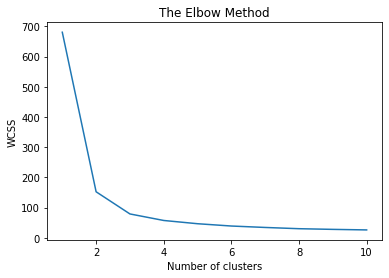

In [56]:
#Using the elbow method to determine the optimal number of clusters for k-means clustering
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
##Referred from- https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset/notebook

In [ ]:
#Implementing K-Means Clustering

In [58]:
# Kmeans Ref-"https://scikit-learn.org/stable/modules/clustering.html#k-means"
       # Reference 2 - " https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html"


#  KMean Syntax Reference-"https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/cluster/_kmeans.py#L763"
# Applying KMeans to the dataset with the optimal number of cluster
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

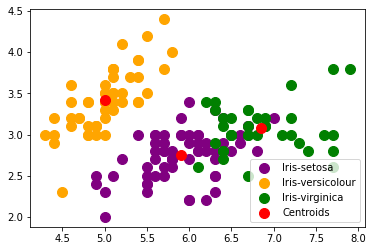

In [59]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [60]:
#Check Accuracy
labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y_kmeans == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_kmeans.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y_kmeans.size)))

Result: 150 out of 150 samples were correctly labeled.
Accuracy score: 1.00


In [ ]:
#Differentially private KMEANS


In [ ]:
 #CASE2-EVALUATING PRIVACY PRESERVING  KMEANS WITHOUT EPILSON AND BOUND VALUE 

In [ ]:
#Using the diffprivlib.models.KMeans module of diffprivlib, we can train a KMeans while satisfying differential privacy
#Referred from- https://diffprivlib.readthedocs.io/en/latest/modules/models.html#k-means

#Syntax- classdiffprivlib.models.KMeans(n_clusters=8, *, epsilon=1.0, bounds=None, accountant=None, **unused_args)
#Syntax Source- https://diffprivlib.readthedocs.io/en/latest/_modules/diffprivlib/models/k_means.html#KMeans

#K-Means clustering with differential privacy.


#Implements the DPLloyd approach presented in [SCL16], leveraging the sklearn.cluster.KMeans class for full integration with Scikit Learn.
#PLEASE Refer the "Reference Folder in LAB 13-> Differentially Private K-Means Clustering" to Know More about DPLloyd approach

In [67]:

from diffprivlib.models import KMeans


In [89]:
#Finding the optimum number of clusters for k-means classification
wcss =[]
for i in range (1,11):
    private_clf  = KMeans()
    private_clf .fit(X)
    wcss.append( private_clf.inertia_)


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/k_means.py:130: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  "privacy leakage, specify `bounds` for each dimension.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/k_means.py:130: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  "privacy leakage, specify `bounds` for each dimension.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/k_means.py:130: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additio

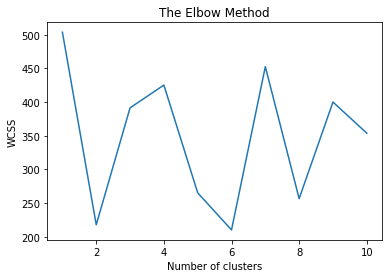

In [92]:
#Using the elbow method to determine the optimal number of clusters for k-means clustering
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
##Referred from- https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset/notebook

 Since The elbow point in the above graph is difficult to find- We Can Use -Kneedle algorithm
 Referred From- https://towardsdatascience.com/detecting-knee-elbow-points-in-a-graph-d13fc517a63c

In [94]:
!pip install --upgrade kneed

In [99]:
# pip install kneed or conda install kneed
from kneed import KneeLocator, DataGenerator

The knee point is loosely defined as the point of maximum curvature in a system. Identifying this location can be useful in many instances, but in machine learning it can be used for assiting with selection of an appropriate value of k in K-means clustering.
Python package, kneed, that can be used to detect the knee or elbow point by attempting an implmentation of the Kneedle algorithm.
Referred From- https://www.kaggle.com/code/kevinarvai/knee-elbow-point-detection/notebook

2


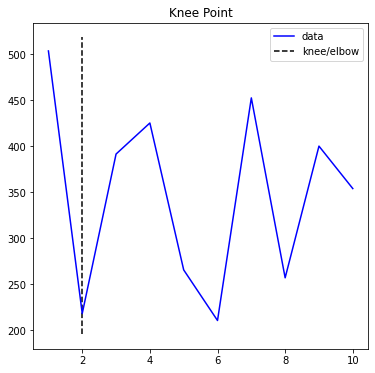

In [111]:
#The knee (or elbow) point is calculated simply by instantiating the KneeLocator class with x, y and the appropriate curve and direction.
kneedle = KneeLocator(range(1,11),wcss, S=1.0, curve='convex', direction='decreasing')
# Raw data and knee
kneedle.plot_knee()
# kneedle.elbow store the point of maximum curvature.
print(round(kneedle.elbow, 3))
#Referred From- " https://github.com/arvkevi/kneed"

Here only k=2 as we have not specified any parameters inside the KMeans Function.

In [69]:
#Implement K Means 
clf = KMeans()
clf.fit(X)

/usr/local/lib/python3.7/dist-packages/diffprivlib/models/k_means.py:130: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  "privacy leakage, specify `bounds` for each dimension.", PrivacyLeakWarning)


KMeans(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0), (1.0, 0), (1.0, 0), (1.0, 0), ...]),
       bounds=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])))

diffprivlib.models.KMeans can be run without any parameters, although this will throw a warning (we need to specify the bounds parameter to avoid this). The privacy level is controlled by the parameter epsilon, which is passed to the classifier at initialisation (e.g. KMeans(epsilon=0.1)). The default is epsilon = 1.0.
Referred From -"https://github.com/IBM/differential-privacy-library"

In [ ]:
#Every time the model is trained with .fit(), a different model is produced due to the randomness of differential privacy. 
#Referred From- " https://github.com/IBM/differential-privacy-library"

In [112]:
kmeans = KMeans(n_clusters = 2, epsilon=1.0, bounds=None)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/diffprivlib/models/k_means.py:130: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  "privacy leakage, specify `bounds` for each dimension.", PrivacyLeakWarning)


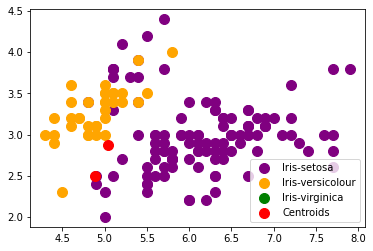

In [113]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
#plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [ ]:
 #CASE3-EVALUATING PRIVACY PRESERVING  KMEANS WITH EPILSON AND BOUND VALUE SET
 #evaluate the accuracy of the model for various epsilon values and plot it with matplotlib.

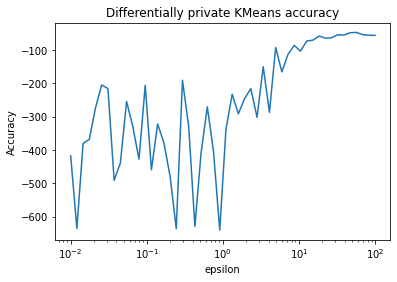

In [114]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
bounds = ([4.3, 2.0, 1.1, 0.1], [7.9, 4.4, 6.9, 2.5])
accuracy = list()

for epsilon in epsilons:
    clf = KMeans(bounds=bounds, epsilon=epsilon)
    clf.fit(X)
    
    accuracy.append(clf.score(X))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private KMeans accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()